# **To study and implement Simple Linear Regression for predicting a continuous dependent variable,and to analyze the relationship between two quantitative variables using the Weather Dataset.**

In this block, we’ll import all the essential Python libraries required for data analysis and visualization such as pandas, numpy, and matplotlib. These will be common for all future experiments.

In [ ]:
# 📦 Block 1 — Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


This block allows users to upload their dataset (CSV format) directly into Google Colab.
It uses files.upload() so that the CSV file is read and loaded as a pandas DataFrame.

In [ ]:
# 📂 Block 2 — Upload CSV File (Limited Rows)

from google.colab import files
import io

print("📁 Please upload your CSV dataset file...")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]), nrows=100)  # ⬅️ load first 100 rows only

print(f"✅ '{filename}' uploaded successfully and first 100 rows loaded!")
print("\n📊 First 5 rows of the dataset:")
df.head()


📁 Please upload your CSV dataset file...


Saving weatherHistory.csv to weatherHistory (1).csv
✅ 'weatherHistory (1).csv' uploaded successfully and first 100 rows loaded!

📊 First 5 rows of the dataset:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Here, we’ll quickly inspect the dataset to understand its structure and clean any missing or irrelevant data before applying the regression model.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            100 non-null    object 
 1   Summary                   100 non-null    object 
 2   Precip Type               100 non-null    object 
 3   Temperature (C)           100 non-null    float64
 4   Apparent Temperature (C)  100 non-null    float64
 5   Humidity                  100 non-null    float64
 6   Wind Speed (km/h)         100 non-null    float64
 7   Wind Bearing (degrees)    100 non-null    float64
 8   Visibility (km)           100 non-null    float64
 9   Loud Cover                100 non-null    float64
 10  Pressure (millibars)      100 non-null    float64
 11  Daily Summary             100 non-null    object 
dtypes: float64(8), object(4)
memory usage: 9.5+ KB

Missing Values:
Formatted Date              0
Summary      

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


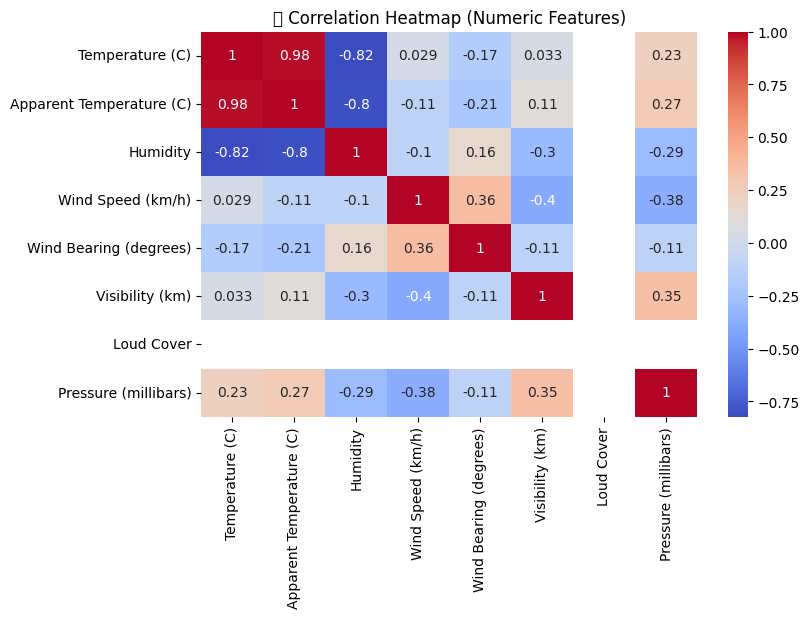

In [ ]:
# 🔍 Block 3 — Data Overview & Cleaning

print("Dataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

# Keep only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

print("\n✅ Numeric columns retained for analysis:")
print(df_numeric.columns.tolist())

# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("📈 Correlation Heatmap (Numeric Features)")
plt.show()


Text:
Now, we apply Simple Linear Regression — a statistical method to model the relationship between one independent variable (X) and one dependent variable (Y).

Mathematically:


Y=mX+c

where

m is the slope

c is the intercept

We’ll split the dataset into training and testing sets, train the model, and evaluate its performance.

In [ ]:
# 📈 Block 4 — Simple Linear Regression

X = df_numeric[['Temperature (C)']]
Y = df_numeric[['Apparent Temperature (C)']]

# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict
Y_pred = model.predict(X_test)

# Coefficients and Metrics
print(f"🧮 Slope (m): {model.coef_[0][0]:.4f}")
print(f"📍 Intercept (c): {model.intercept_[0]:.4f}")

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"\n✅ Model Evaluation:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")


🧮 Slope (m): 1.2293
📍 Intercept (c): -3.7894

✅ Model Evaluation:
Mean Squared Error: 1.475
R² Score: 0.954


Finally, let’s visualize the regression line along with actual data points to see how well the model fits.

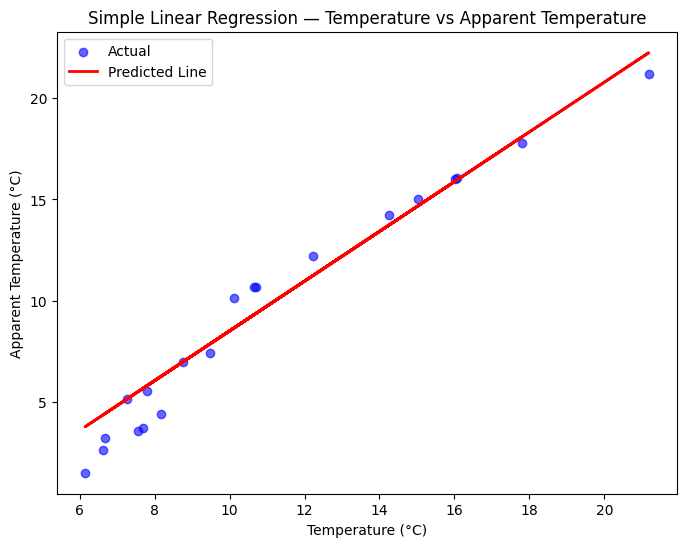

In [ ]:
# 🎨 Block 5 — Regression Line Plot

plt.figure(figsize=(8,6))
plt.scatter(X_test, Y_test, color='blue', label='Actual', alpha=0.6)
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel("Temperature (°C)")
plt.ylabel("Apparent Temperature (°C)")
plt.title("Simple Linear Regression — Temperature vs Apparent Temperature")
plt.legend()
plt.show()


**Analysis**

The linear regression graph shows a straight red line that best fits the blue data points.
It reveals how closely Apparent Temperature changes with Temperature — the stronger the alignment, the higher the R² score.
Residual plots show if errors are normally distributed; smaller spread = better fit.
We choose simple linear regression here because there is a clear continuous, linear relationship between temperature readings.
This method helps us predict numeric values (like how warm it feels) from another continuous variable.